# Prática 5: circuitos RL e RC

### Circuito RC

In [42]:
import numpy as np
import matplotlib.pyplot as plt

dados_rc = np.loadtxt('dados/rc.dat').T
f, escVt, quadVt, escVr, quadVr, escdt, quaddt = dados_rc
Vt = escVt*quadVt/2
Vr = escVr*quadVr/2
dt = escdt*quaddt/2

R = 47 # substituir com dados reais
C = .22e-6 # substituir com dados reais

tabela = np.column_stack((f,Vt,Vr,dt))
print(tabela)

[[  5.00000000e+01   2.00000000e+00   5.00000000e-01   1.50000000e-03]
 [  1.00000000e+02   1.90000000e+00   5.75000000e-01   2.00000000e-03]]


In [43]:
# Análise da fase

omega = 2*np.pi*f
phi = -dt*omega  # fase em radianos
phi_teorico = np.arctan(-1/(omega*R*C))
tabela = np.column_stack((f,phi,phi_teorico,phi-phi_teorico))
print(tabela)

[[  50.           -0.4712389    -1.56754793    1.09630903]
 [ 100.           -1.25663706   -1.5642996     0.30766254]]


obtido: -1720.44521643 esperado: 96711.79883945841


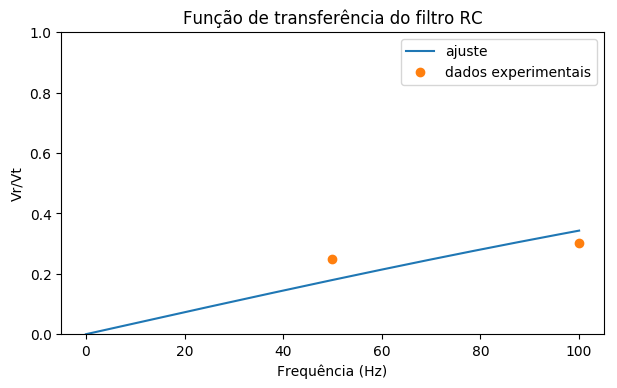

In [44]:
# Análise da curva característica

from scipy.optimize import curve_fit
modelo = lambda omega, omega_0: 1/np.sqrt(1+(omega_0/omega)**2)

ajuste_rc, mcov_rc = curve_fit(modelo, omega, Vr/Vt, [1/(R*C)])
omega_0 = ajuste_rc[0]
print('obtido:',omega_0,'esperado:',1/(R*C))

plt.figure(figsize=(7,4),dpi=100)
lin_omega = np.linspace(0.1,omega[-1],200)
lin_f = lin_omega/(2*np.pi)
plt.plot(lin_f,modelo(lin_omega,omega_0),label='ajuste')
plt.plot(f,Vr/Vt,'o',label='dados experimentais')
plt.legend()
plt.title('Função de transferência do filtro RC')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Vr/Vt')
plt.ylim(0,1)
plt.show()

### Circuito RL

In [45]:
dados_rl = np.loadtxt('dados/rl.dat').T
f, escVt, quadVt, escVr, quadVr, escdt, quaddt = dados_rl
Vt = escVt*quadVt/2
Vr = escVr*quadVr/2
dt = escdt*quaddt/2

R = 47 # substituir com dados reais
L = 50e-3 # substituir com dados reais

tabela = np.column_stack((f,Vt,Vr,dt))
print(tabela)

[[  5.00000000e+01   1.90000000e+00   5.75000000e-01   2.00000000e-03]
 [  1.00000000e+02   2.00000000e+00   5.00000000e-01   1.50000000e-03]]


In [46]:
# Análise da fase

omega = 2*np.pi*f
phi = dt*omega  # fase em radianos
phi_teorico = np.arctan(omega*L/R)
tabela = np.column_stack((f,phi,phi_teorico,phi-phi_teorico))
print(tabela)

[[  50.            0.62831853    0.32254113    0.3057774 ]
 [ 100.            0.9424778     0.58921821    0.35325959]]


obtido: -114.733062932 esperado: 940.0


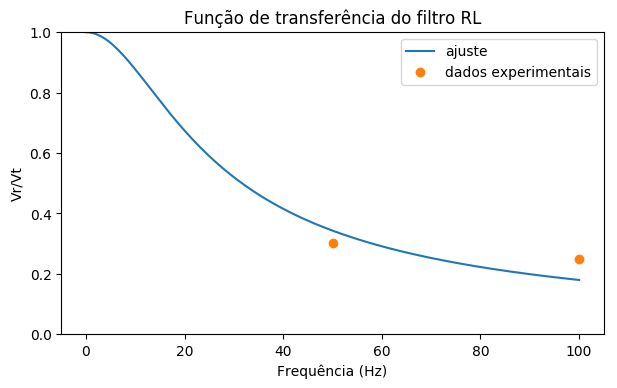

In [47]:
# Análise da curva característica

from scipy.optimize import curve_fit
modelo = lambda omega, omega_0: 1/np.sqrt(1+(omega/omega_0)**2)

ajuste_rl, mcov_rl = curve_fit(modelo, omega, Vr/Vt, [1/(R*C)])
omega_0 = ajuste_rl[0]
print('obtido:',omega_0,'esperado:',R/L)

plt.figure(figsize=(7,4),dpi=100)
lin_omega = np.linspace(0.01,omega[-1],200)
lin_f = lin_omega/(2*np.pi)
plt.plot(lin_f,modelo(lin_omega,omega_0),label='ajuste')
plt.plot(f,Vr/Vt,'o',label='dados experimentais')
plt.legend()
plt.title('Função de transferência do filtro RL')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Vr/Vt')
plt.ylim(0,1)
plt.show()

### Resistência do indutor

In [ ]:
from scipy.stats import linregress

dados_res = np.loadtxt('dados/res.dat').T #dados do arduino
R = 10 # trocar por medida real
V, Vr = dados
I = Vr/R

R_ind, intercept, r, prob2, stderrest = linregress(I,V)
print('resistência do indutor:',R_ind)